In [75]:
from sklearn import preprocessing, cross_validation, datasets, svm, metrics
from sklearn.linear_model import LinearRegression
import quandl 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


# linear regression

In [32]:
df=quandl.get('WIKI/GOOGL')

In [33]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [34]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [35]:
forecast_out=int(math.ceil(0.01*len(df))) 

In [36]:
forecast_col='Adj. Close'

In [37]:
df['label']=df[forecast_col].shift(-forecast_out) #get the number in the future

In [43]:
df.dropna(inplace=True)

In [46]:
x=np.array(df.drop(['label'],axis=1)) #1 is column
y=np.array(df['label'])

In [49]:
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=0.2)

In [50]:
clt=LinearRegression() #create linear regression object
clt.fit(x_train,y_train)
accuracy=clt.score(x_test,y_test) 

In [ ]:
clt.predict(x_test)

# sklearn

In [90]:
iris=pd.DataFrame(datasets.load_iris().data) #attributes: data, feature_names, target, target_names #dir(dataset) to check attributes

In [94]:
iris.columns=['a','b','c','d']

In [98]:
print(iris.head())

     a    b    c    d
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


## svm digits

In [57]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [2]:
digits=datasets.load_digits()

In [16]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [21]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
target_names (10,)
DESCR
images (1797, 8, 8)


In [22]:
image_and_label=list(zip(digits.images,digits.target)) #x=[1,2],y=[3,4],zip(x,y)=[[1,3],[2,4]]

In [43]:
#every number is represented by 8*8 matrix using number 
for i,(image,label) in enumerate(image_and_label[:4]):     #i is index
    plt.subplot(1,4,i+1) #subplot(nrow,ncol,plotnumber)
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest') #imshow is used for displaying color, cmap is color map
    plt.axis('off')
    plt.title(label) 

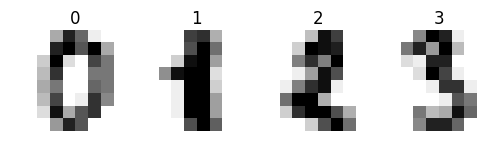

In [44]:
plt.show()

In [45]:
data=digits.images.reshape(len(digits.images),64) #reshape data into 1*64 matrix, equivalent to using digits.data directly

In [76]:
classifier=svm.SVC(gamma=0.001)
classifier.fit(digits.data[:1000],digits.target[:1000])
predicted=classifier.predict(digits.data[1001:])
expected=digits.target[1001:]

In [77]:
print(metrics.confusion_matrix(expected, predicted))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 76  1  0  0  0  0  0  1  1]
 [ 0  0 76  1  0  0  0  0  0  0]
 [ 0  0  0 68  0  3  0  4  4  0]
 [ 0  0  0  0 79  0  0  0  0  4]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  0  0  0  0  0  0  0 76  0]
 [ 0  0  0  1  0  1  0  0  0 79]]


# Machine Learning Michigan University